Capstone 2 project

Data wrangling


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

In [2]:
loan_desc = pd.read_csv('../data/data_dictionary.csv')
loan_desc = loan_desc.drop('Unnamed: 0', 1)
loan_desc

,Variable Name,Description,Unnamed: 2
0,UniqueID,Identifier for customers,NaN
1,loan_default,Payment default in the first EMI on due date,NaN
2,disbursed_amount,Amount of Loan disbursed,NaN
3,asset_cost,Cost of the Asset,NaN
4,ltv,Loan to Value of the asset,NaN
5,branch_id,Branch where the loan was disbursed,NaN
6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,Current_pincode,Current pincode of the customer,NaN
9,Date.of.Birth,Date of birth of the customer,NaN


In [3]:
loan_data = pd.read_csv('../data/train.csv')

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [5]:
loan_data.columns = loan_data.columns.str.replace('.','_')

<ipython-input-5-db274bf2b123>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  loan_data.columns = loan_data.columns.str.replace('.','_')


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date_of_Birth                        233154 non-null  object 
 9   Employment_Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [7]:
pd.set_option('display.max_columns', None)
loan_data.head(20)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,16-09-18,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,05-09-18,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,16-09-18,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [8]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


In [9]:
from datetime import datetime
#loan_data['Date_of_Birth'] = datetime.strptime(loan_data['Date_of_Birth'], '%d/%m/%y')
#loan_data['Date_of_Birth'] = pd.to_datetime(loan_data['Date_of_Birth'], format='%d%m%y') changed to below format needed to be format='%d-%m-%y'
loan_data['Date_of_Birth'] = pd.to_datetime(loan_data['Date_of_Birth'], infer_datetime_format=True)
loan_data['Date_of_Birth']

0        1984-01-01
1        1985-07-31
2        1985-08-24
3        1993-12-30
4        1977-09-12
            ...    
233149   1988-01-08
233150   1988-05-12
233151   1976-01-06
233152   1994-03-26
233153   1984-02-18
Name: Date_of_Birth, Length: 233154, dtype: datetime64[ns]

In [10]:
loan_data['DisbursalDate'] = pd.to_datetime(loan_data['DisbursalDate'], infer_datetime_format=True)
loan_data['DisbursalDate']

0        2018-03-08
1        2018-09-26
2        2018-01-08
3        2018-10-26
4        2018-09-26
            ...    
233149   2018-10-26
233150   2018-10-23
233151   2018-10-24
233152   2018-09-29
233153   2018-10-27
Name: DisbursalDate, Length: 233154, dtype: datetime64[ns]

In [11]:
from dateutil.relativedelta import relativedelta

#difference_in_years = relativedelta(end_date, start_date).years
#loan_data['age_of_cust'] = relativedelta(loan_data['DisbursalDate'], loan_data['Date_of_Birth']).years
#recieved value error, using a lambda expression to resolve.
loan_data['age_of_cust'] = loan_data.apply(lambda x: relativedelta(x['DisbursalDate'], x['Date_of_Birth']).years, axis=1)

loan_data['age_of_cust']

0         34
1         33
2         32
3         24
4         41
          ..
233149    30
233150    30
233151    42
233152    24
233153    34
Name: age_of_cust, Length: 233154, dtype: int64

In [12]:
#AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH are in this format 0yrs 0mon need to convert to numeric months
def to_month(x):
    parsed = x.split(' ')
    year = int(parsed[0].replace('yrs',''))
    month = int(parsed[1].replace('mon',''))
    return (year*12)+month

In [13]:
loan_data['AVERAGE_ACCT_AGE_MONTHS'] = loan_data['AVERAGE_ACCT_AGE'].apply(to_month)
loan_data['AVERAGE_ACCT_AGE_MONTHS'].value_counts()

0      119373
6        6028
7        5366
11       5237
10       5143
        ...  
167         1
292         1
227         1
158         1
192         1
Name: AVERAGE_ACCT_AGE_MONTHS, Length: 192, dtype: int64

In [14]:
loan_data['CREDIT_HISTORY_LENGTH_MONTHS'] = loan_data['CREDIT_HISTORY_LENGTH'].apply(to_month)
loan_data['CREDIT_HISTORY_LENGTH_MONTHS'].value_counts()

0      119127
6        4761
25       4745
7        4017
24       3833
        ...  
279         1
240         1
369         1
277         1
220         1
Name: CREDIT_HISTORY_LENGTH_MONTHS, Length: 294, dtype: int64

In [15]:
missing = pd.concat([loan_data.isnull().sum(), 100 * loan_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count','%'])

,count,%
UniqueID,0,0.000000
disbursed_amount,0,0.000000
asset_cost,0,0.000000
ltv,0,0.000000
branch_id,0,0.000000
supplier_id,0,0.000000
manufacturer_id,0,0.000000
Current_pincode_ID,0,0.000000
Date_of_Birth,0,0.000000
DisbursalDate,0,0.000000


In [16]:
missing = pd.concat([loan_data.isna().sum(), 100 * loan_data.isna().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count','%'],ascending=False)

,count,%
Employment_Type,7661,3.285811
UniqueID,0,0.000000
disbursed_amount,0,0.000000
asset_cost,0,0.000000
ltv,0,0.000000
branch_id,0,0.000000
supplier_id,0,0.000000
manufacturer_id,0,0.000000
Current_pincode_ID,0,0.000000
Date_of_Birth,0,0.000000


In [17]:
loan_data['Employment_Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment_Type, dtype: int64

In [18]:
loan_data = loan_data.dropna()

In [19]:
loan_data.shape

(225493, 44)

In [20]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,225493.0,535677.453783,6.833722e+04,417428.0,476481.00,535593.00,594774.00,6.710840e+05
disbursed_amount,225493.0,54240.728830,1.277559e+04,13320.0,47049.00,53703.00,60213.00,9.873540e+05
asset_cost,225493.0,75631.131884,1.852758e+04,37000.0,65625.00,70807.00,78966.00,1.328954e+06
ltv,225493.0,74.806634,1.144189e+01,13.5,68.96,76.89,83.73,9.500000e+01
branch_id,225493.0,73.070614,7.001415e+01,1.0,14.00,61.00,130.00,2.610000e+02
supplier_id,225493.0,19645.597890,3.494024e+03,10524.0,16555.00,20333.00,23004.00,2.480300e+04
manufacturer_id,225493.0,69.072251,2.216468e+01,45.0,48.00,86.00,86.00,1.560000e+02
Current_pincode_ID,225493.0,3375.718133,2.253217e+03,1.0,1509.00,2949.00,5682.00,7.345000e+03
State_ID,225493.0,7.241551,4.460856e+00,1.0,4.00,6.00,10.00,2.200000e+01
Employee_code_ID,225493.0,1550.665453,9.756646e+02,1.0,713.00,1452.00,2365.00,3.795000e+03


In [21]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             225493 non-null  int64         
 1   disbursed_amount                     225493 non-null  int64         
 2   asset_cost                           225493 non-null  int64         
 3   ltv                                  225493 non-null  float64       
 4   branch_id                            225493 non-null  int64         
 5   supplier_id                          225493 non-null  int64         
 6   manufacturer_id                      225493 non-null  int64         
 7   Current_pincode_ID                   225493 non-null  int64         
 8   Date_of_Birth                        225493 non-null  datetime64[ns]
 9   Employment_Type                      225493 non-null  object        
 

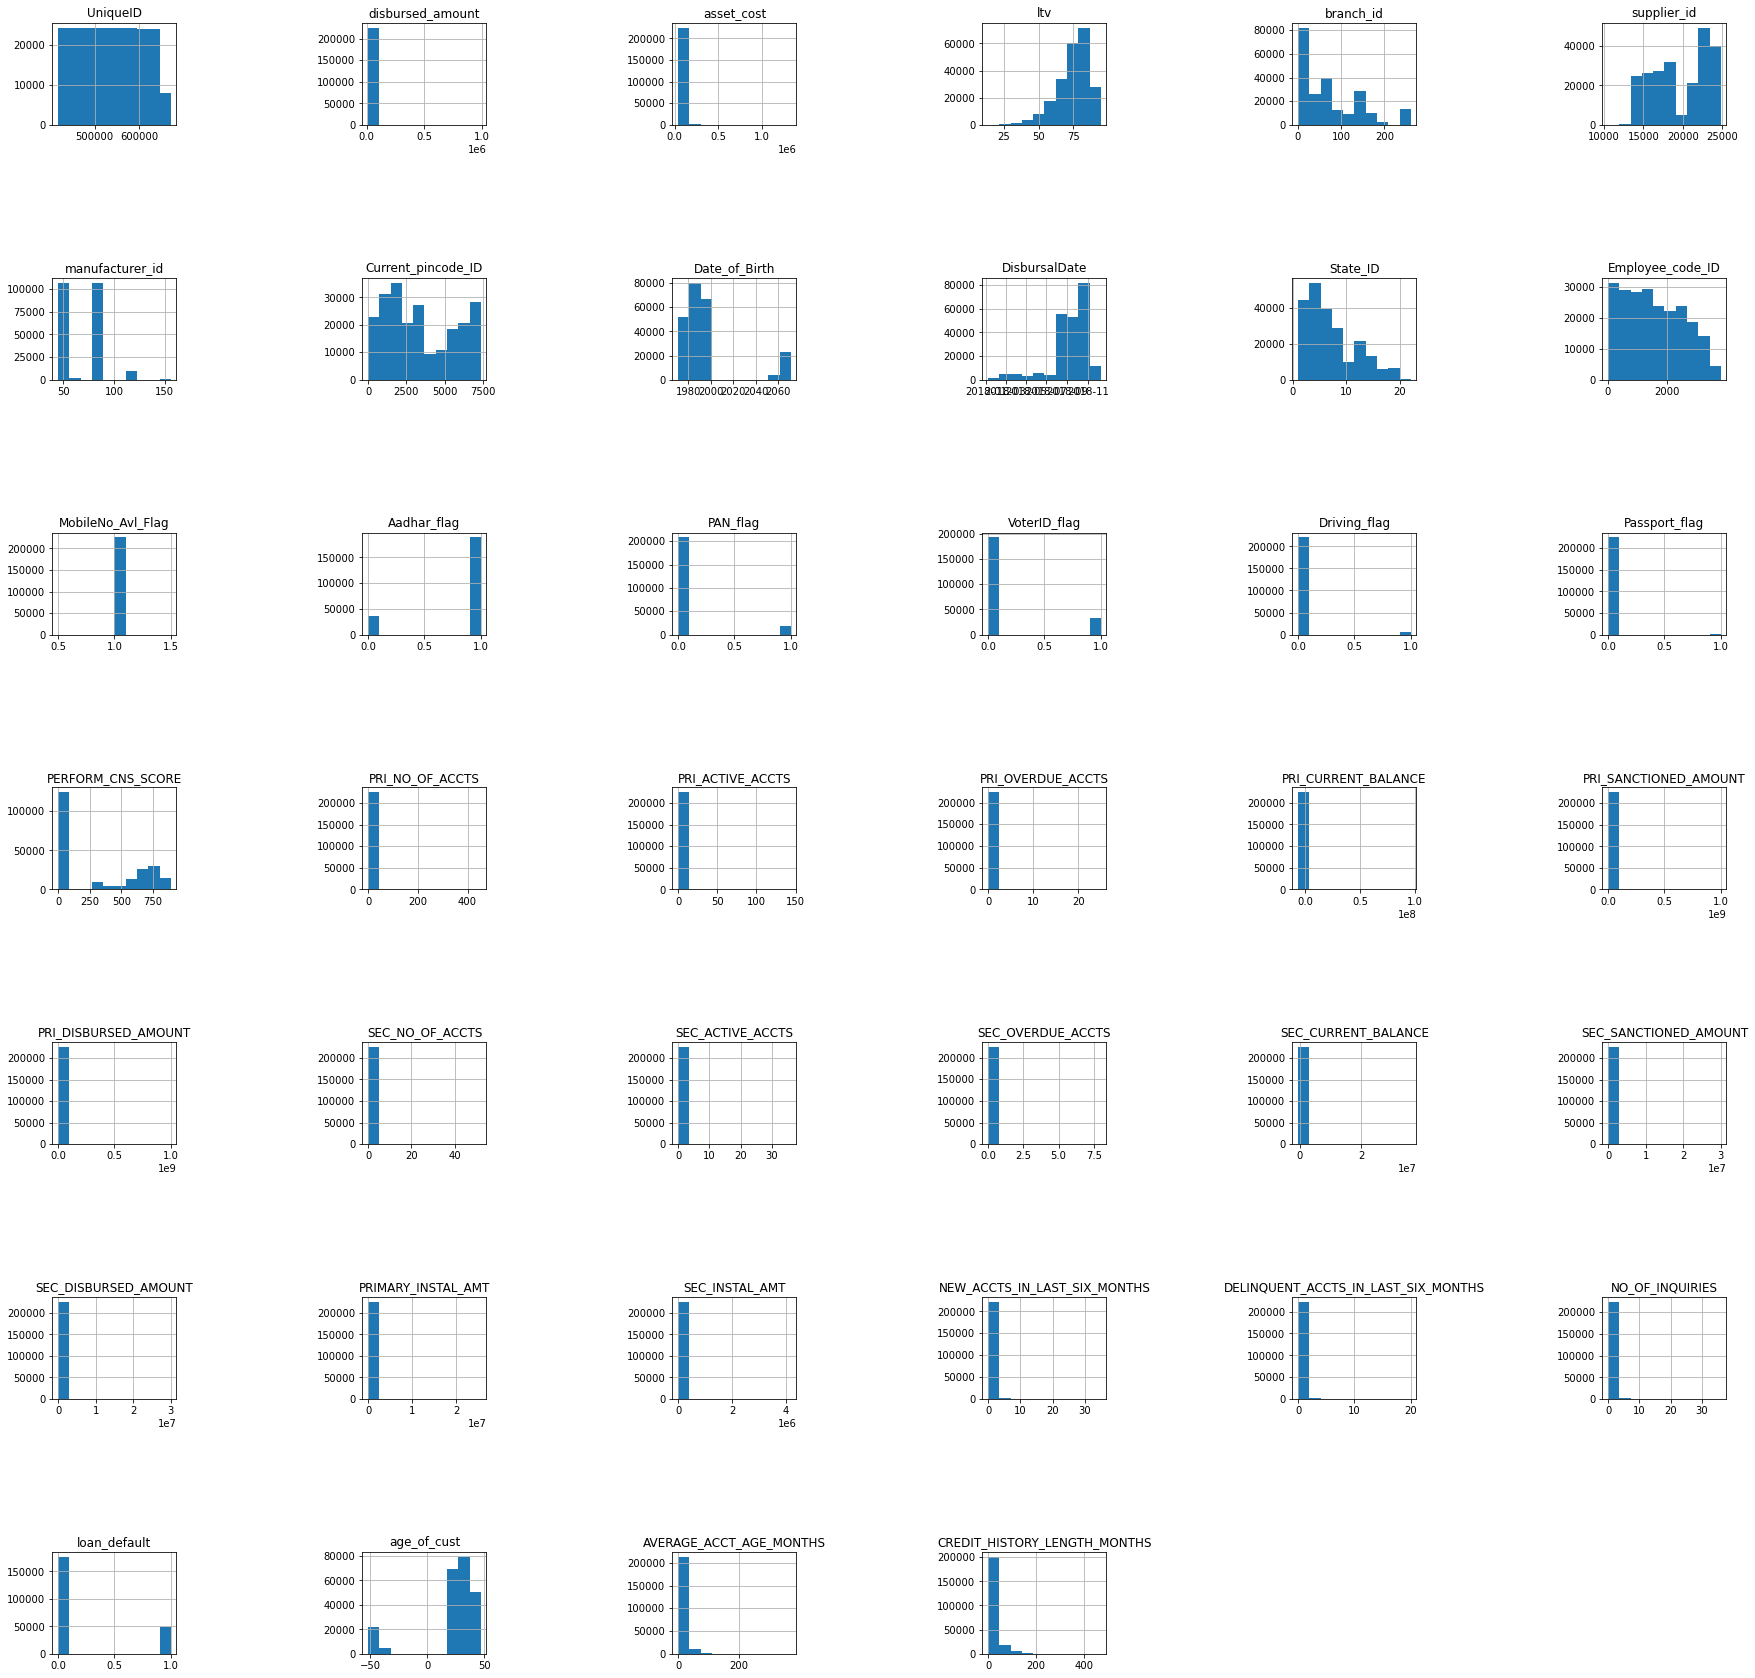

In [22]:
loan_data.hist(figsize=(30,30))
plt.subplots_adjust(hspace=1.5, wspace=1.5);